In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for Outliers
from scipy.stats import zscore

# Data Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, plot_confusion_matrix

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

# Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
df=pd.read_csv('loan_prediction.csv')
print(df.shape)
df.head(10)

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observation: There are lot of outliers except for 'Credit_history'

In [5]:
for i in df.columns:
    print(i)
    print('# of unique values -->', df[i].nunique())
    if df[i].nunique()<15:
        print(df[i].unique())
    else:
        print(df[i].describe())
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

Loan_ID
# of unique values --> 614
count          614
unique         614
top       LP001841
freq             1
Name: Loan_ID, dtype: object
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Gender
# of unique values --> 2
['Male' 'Female' nan]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Married
# of unique values --> 2
['No' 'Yes' nan]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dependents
# of unique values --> 4
['0' '1' '2' '3+' nan]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Education
# of unique values --> 2
['Graduate' 'Not Graduate']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Self_Employed
# of unique values --> 2
['No' 'Yes' nan]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
ApplicantIncome
# of unique values --> 505
count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000

## Handling Missing Data

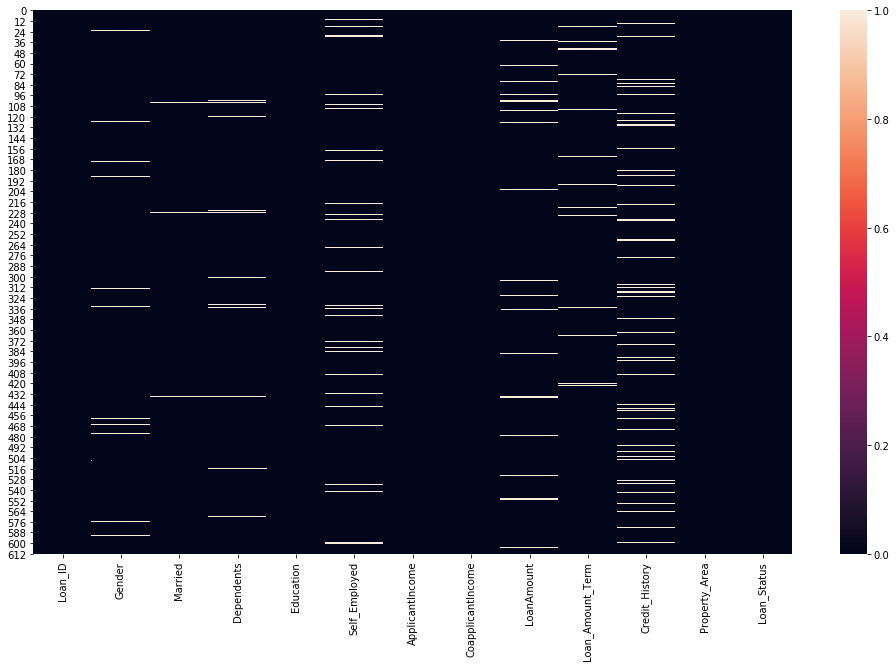

In [6]:
plt.figure(figsize=(17,10))
sns.heatmap(df.isnull())

In [7]:
#Dealing with NULL values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

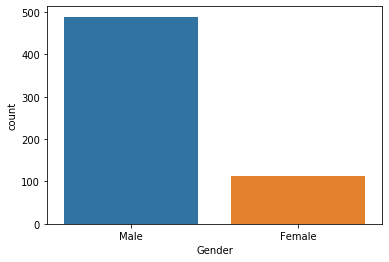

In [8]:
#Gender
sns.countplot('Gender', data=df)

Males are 3 times more than females. It would not be fair to go with mode here. Let's see how much data we will loose if we remove those null rows

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
cat_df,num_df=[],[]
for i in df.columns:
    if df[i].dtype=='O':
        cat_df.append(i)
    else:
        num_df.append(i)
print('cat_df >>> \n',cat_df,'\nnum_df >>> \n',num_df)

cat_df >>> 
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'] 
num_df >>> 
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [11]:
# Removing rows where there is null values in categorical data
print(df.shape[0])
df=df[(df['Gender']=='Male') | (df['Gender']=='Female')]
print(df.shape[0])
df=df[(df['Married']=='Yes') | (df['Married']=='No')]
print(df.shape[0])
df=df[(df['Dependents']=='0') | (df['Dependents']=='1') | (df['Dependents']=='2') | (df['Dependents']=='3+')]
print(df.shape[0])
df=df[(df['Self_Employed']=='Yes') | (df['Self_Employed']=='No')]
print(df.shape[0])

614
601
598
586
554


In [12]:
# Using Simple Imputer to handle missing numerical values with its mean
si_num=SimpleImputer(missing_values=np.nan, strategy='mean')
a=pd.DataFrame(data=df[num_df])
df_a=si_num.fit_transform(a)
df_num=pd.DataFrame(df_a, columns=num_df)
df_num.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [13]:
df.drop(columns=num_df, axis=1, inplace=True)
df=pd.concat([df,df_num],axis=1)
df.dropna(axis=0, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D06FF88>,
      dtype=object)

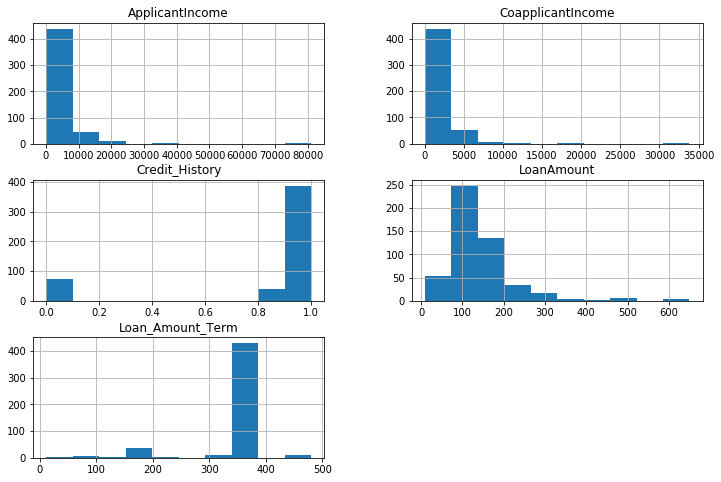

In [14]:
df.hist(figsize=(12,8))

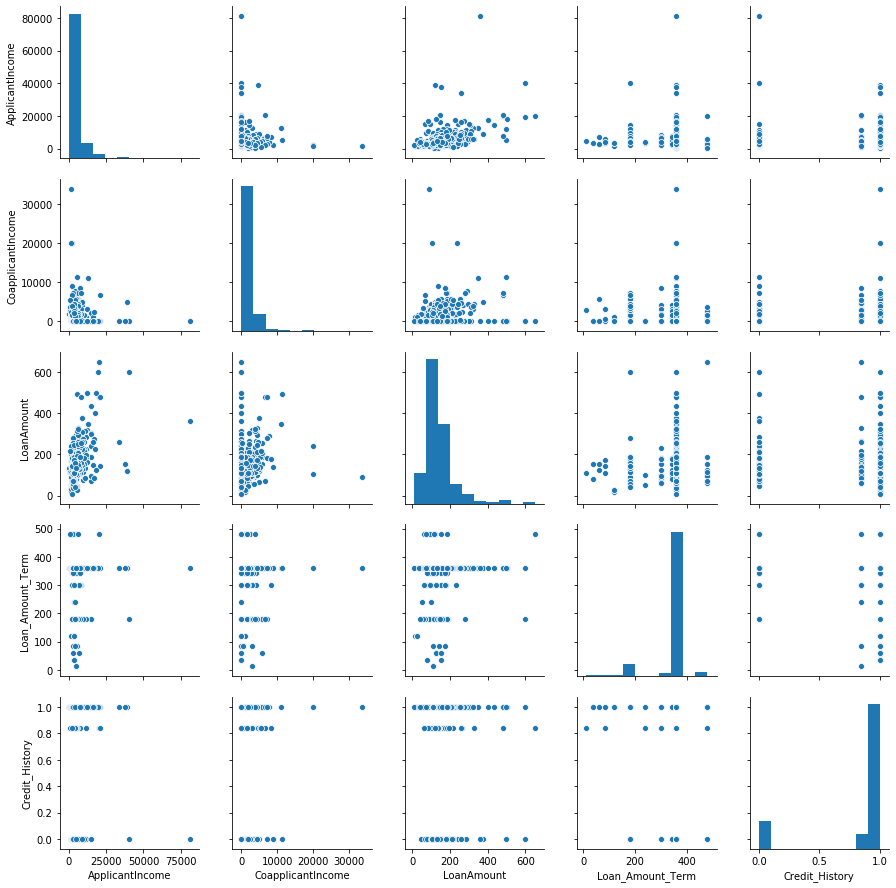

In [15]:
sns.pairplot(df)

In [16]:
# Dropping 'Loan_ID' as it has unique values
df.drop(columns=['Loan_ID'], axis=1, inplace=True)
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

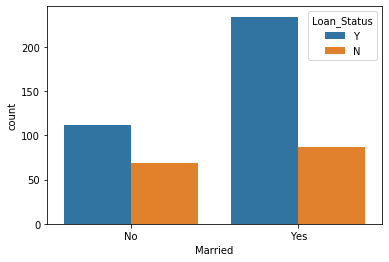

In [17]:
sns.countplot(x='Married', data=df, hue='Loan_Status')

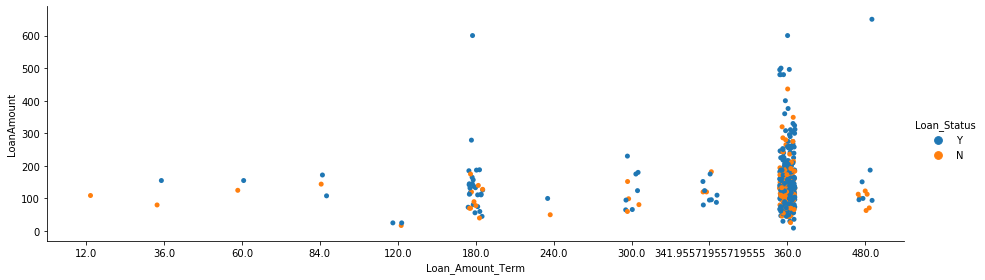

In [18]:
sns.catplot(x='Loan_Amount_Term',y='LoanAmount',data=df,hue='Loan_Status',height=4, aspect=3.2)

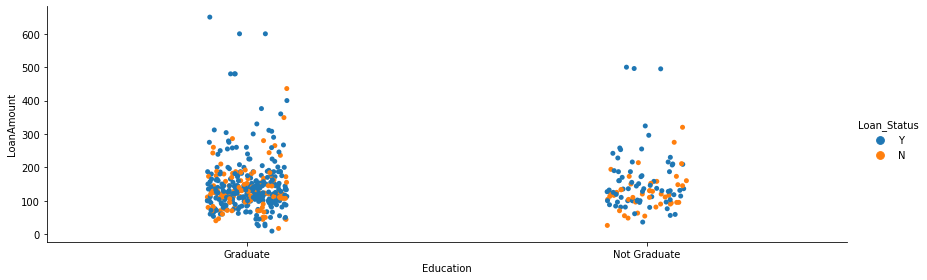

In [19]:
sns.catplot(x='Education',y='LoanAmount',data=df,hue='Loan_Status',height=4, aspect=3)

In [20]:
pd.crosstab(df['Education'],df['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,112,276
Not Graduate,44,70


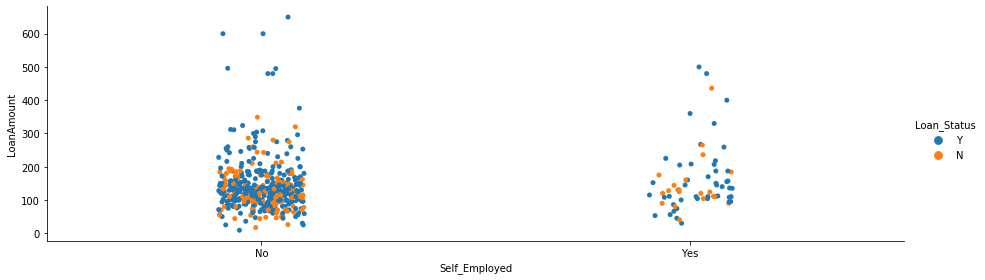

In [21]:
sns.catplot(x='Self_Employed',y='LoanAmount',data=df,hue='Loan_Status',height=4, aspect=3.2)

In [22]:
pd.crosstab(df['Self_Employed'],df['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,135,300
Yes,21,46


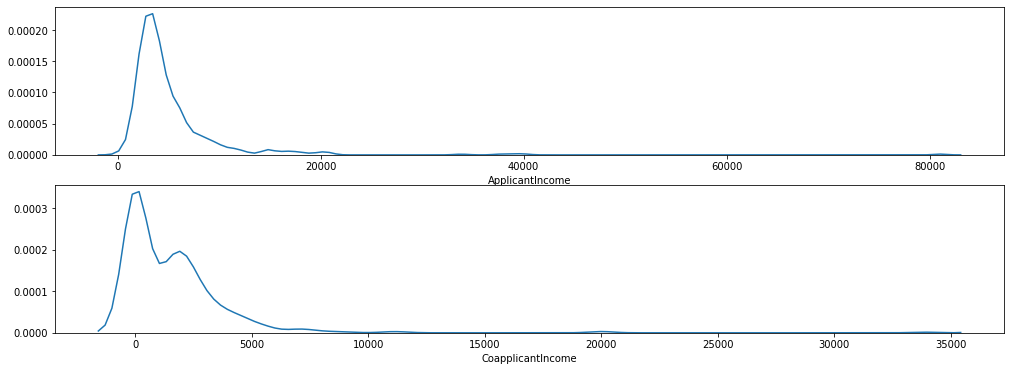

In [23]:
fig = plt.figure(figsize=(17,6))
ax = fig.add_subplot(2,1,1)
sns.distplot(df['ApplicantIncome'],bins=1,hist=False)

ax = fig.add_subplot(2,1,2)
sns.distplot(df['CoapplicantIncome'],bins=1,hist=False)

In [24]:
(df['CoapplicantIncome']>10000).value_counts()

False    497
True       5
Name: CoapplicantIncome, dtype: int64

In [25]:
(df['ApplicantIncome']>20000).value_counts()

False    493
True       9
Name: ApplicantIncome, dtype: int64

## Checking for outliers

In [26]:
z=np.abs(zscore(df[num_df]))
z

array([[0.10856471, 0.61542921, 0.01165147, 0.27862162, 0.45440903],
       [0.11805554, 0.02801519, 0.19842569, 0.27862162, 0.45440903],
       [0.40142036, 0.61542921, 0.96831403, 0.27862162, 0.45440903],
       ...,
       [0.5064927 , 0.52194157, 1.35376855, 0.27862162, 0.45440903],
       [0.41895928, 0.61542921, 0.53420999, 0.27862162, 0.45440903],
       [0.11805554, 0.61542921, 0.13633792, 0.27862162, 2.38769154]])

In [27]:
#consider threshold = 3
print(np.where(z>3))

(array([  9,  12,  56,  82, 104, 107, 127, 127, 145, 145, 151, 153, 200,
       216, 231, 257, 262, 327, 334, 340, 362, 397, 406, 415, 426, 428,
       446, 460, 472, 476, 480, 492], dtype=int64), array([1, 3, 3, 3, 2, 3, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 1, 0, 1, 0, 2,
       3, 2, 2, 2, 3, 2, 3, 1, 3, 2], dtype=int64))


In [28]:
df=df[(z<3).all(axis=1)]

In [29]:
#separating categorical and numerical features
cat1_col,cat2_col,num_col=[],[],[]
for i in df.columns:
    if df[i].dtypes == 'O':
        if df[i].nunique() > 2:
            cat2_col.append(i)
        else:
            cat1_col.append(i)
    else:
        num_col.append(i)
print('Categorical Data ->',cat1_col,' & ',cat2_col)
print('Numerical Data ->',num_col)

Categorical Data -> ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']  &  ['Dependents', 'Property_Area']
Numerical Data -> ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [30]:
# Splitting x and y
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
y.replace({'N':0,'Y':1},inplace=True)

In [31]:
# Instantiate labelEncoder for categorical features with 2 values
le=LabelEncoder()
for i in cat1_col:
    if i!='Loan_Status':
        x[i]=le.fit_transform(x[i])
    else: continue

In [32]:
print('# of dummy columns created -> ', pd.get_dummies(x[cat2_col]).shape[1])
x=pd.get_dummies(x)
print('# of total columns in x -> ', x.shape[1])

# of dummy columns created ->  7
# of total columns in x ->  16


In [33]:
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849.0,0.0,144.917757,360.0,1.0,1,0,0,0,0,0,1
1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,1,0,0,1,0,0
2,1,1,0,1,3000.0,0.0,66.000000,360.0,1.0,1,0,0,0,0,0,1
3,1,1,1,0,2583.0,2358.0,120.000000,360.0,1.0,1,0,0,0,0,0,1
4,1,0,0,0,6000.0,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,1,1,0,0,2900.0,0.0,71.000000,360.0,1.0,1,0,0,0,1,0,0
550,1,1,0,1,4106.0,0.0,40.000000,180.0,1.0,0,0,1,0,1,0,0
551,1,1,1,0,8072.0,240.0,253.000000,360.0,1.0,0,1,0,0,1,0,0
552,1,1,0,0,7583.0,0.0,187.000000,360.0,1.0,0,1,0,0,0,0,1


In [34]:
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(x)

## Machine Learning Algorithms

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print('x_train.shape: ',x_train.shape,'x_test.shape:',x_test.shape,'\ny_train.shape:',y_train.shape,'y_test.shape:',y_test.shape)

x_train.shape:  (377, 16) x_test.shape: (95, 16) 
y_train.shape: (377,) y_test.shape: (95,)


In [36]:
# Instantiate all models
logr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier()
bgc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()

In [37]:
models={'Logistic Regression':logr,
        'Gaussian NB':gnb,
        'Support Vector Machine':svc,
        'KNeighbors Classifier':knn,
        'Decision Tree Classifier':dtc,
        'XGB Classifier':xgb,
        'Random Forest Classifier':rf,
        'Bagging Classifier':bgc,
        'Extra Trees Classifier':etc,
        'Gradient Boosting Classifier':gbc
       }

In [38]:
def main(cls):
    a_scores=[]
    for model_name,model in cls.items():
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        score=accuracy_score(y_test,y_pred)
        a_scores.append(score*100)
        print('##############################',model_name,'##############################')
        print('>>> Accuracy Score = %0.2f' %(score*100))
        c_matrix=confusion_matrix(y_test,y_pred)
        print('>>> Confusion Matrix: \n',c_matrix)
        TN,FP,FN,TP=c_matrix[0,0],c_matrix[0,1],c_matrix[1,0],c_matrix[1,1]
        print('>>> Recall Score = %0.2f' %((TP)*100/float(TP+FN)))
        print('>>> Specificity = %0.2f' %(TN*100/float(TN+FP)))
        print('>>> False Positive Rate = %0.2f' %(FP*100/float(FP+TN)))
        print('>>> Precision Score = %0.2f' %(TP*100/float(TP+FP)))
        print('>>> Classification Report:')
        print(classification_report(y_test,y_pred))
    return a_scores

In [39]:
a_scores=main(models)

############################## Logistic Regression ##############################
>>> Accuracy Score = 70.53
>>> Confusion Matrix: 
 [[ 1 22]
 [ 6 66]]
>>> Recall Score = 91.67
>>> Specificity = 4.35
>>> False Positive Rate = 95.65
>>> Precision Score = 75.00
>>> Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.04      0.07        23
           1       0.75      0.92      0.83        72

    accuracy                           0.71        95
   macro avg       0.45      0.48      0.45        95
weighted avg       0.60      0.71      0.64        95

############################## Gaussian NB ##############################
>>> Accuracy Score = 64.21
>>> Confusion Matrix: 
 [[ 8 15]
 [19 53]]
>>> Recall Score = 73.61
>>> Specificity = 34.78
>>> False Positive Rate = 65.22
>>> Precision Score = 77.94
>>> Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.35      0.32        

In [40]:
p=pd.DataFrame(data=a_scores,columns=['Accuracy Score'], index=list(models.keys())).sort_values(by = 'Accuracy Score', ascending=False)
print(p)

                              Accuracy Score
Support Vector Machine             74.736842
KNeighbors Classifier              74.736842
Random Forest Classifier           71.578947
Logistic Regression                70.526316
Extra Trees Classifier             70.526316
Gradient Boosting Classifier       70.526316
XGB Classifier                     69.473684
Gaussian NB                        64.210526
Decision Tree Classifier           64.210526
Bagging Classifier                 63.157895


Let's take the top 5 models and perform cross validation

In [41]:
new_models={'Support Vector Machine':svc,
            'KNeighbors Classifier':knn,
            'Random Forest Classifier':rf,
            'Bagging Classifier':bgc,
            'Logistic Regression':logr
           }

In [42]:
cv_scores=[]
for model_name,model in new_models.items():
    score=cross_val_score(model,x_train,y_train,scoring='accuracy',cv=10)
    cv_scores.append((score.mean())*100)
    print(model_name,' >>> Completed')
print(cv_scores)

Support Vector Machine  >>> Completed
KNeighbors Classifier  >>> Completed
Random Forest Classifier  >>> Completed
Bagging Classifier  >>> Completed
Logistic Regression  >>> Completed
[65.78947368421053, 63.4068278805121, 66.34423897581792, 61.79943100995733, 66.33001422475107]


In [43]:
pd.DataFrame(data=cv_scores, columns=['New Accuracy Score'], index=list(new_models.keys())).join(p)

,New Accuracy Score,Accuracy Score
Support Vector Machine,65.789474,74.736842
KNeighbors Classifier,63.406828,74.736842
Random Forest Classifier,66.344239,71.578947
Bagging Classifier,61.799431,63.157895
Logistic Regression,66.330014,70.526316


### Hyperparameter Tuning

In [44]:
# Instantiating with default values
svc=SVC()
knn=KNeighborsClassifier()
rf=RandomForestClassifier(random_state=42)
bgc=BaggingClassifier(SVC(),n_estimators=100, max_features=0.5)
logr=LogisticRegression(random_state=42)

### GridSearchCV Hyperparameter Tuning

In [45]:
svc_param={'kernel':['linear','sigmoid','poly','rbf'],'C':[1,10]}

b_svc=GridSearchCV(svc,svc_param)
b_svc.fit(x_train,y_train)
print('Support Vector Machine >>>', b_svc.best_params_,'\nScore:',b_svc.best_score_)

Support Vector Machine >>> {'C': 1, 'kernel': 'poly'} 
Score: 0.6843157894736842


In [46]:
knn_param={'leaf_size':list(range(1,50)), 'n_neighbors':list(range(1,30)), 'p':[1,2]}
                            
b_knn=GridSearchCV(knn,knn_param)
b_knn.fit(x_train,y_train)
print('KNeighbors Classifier >>>', b_knn.best_params_,'\nScore:',b_knn.best_score_)                

KNeighbors Classifier >>> {'leaf_size': 1, 'n_neighbors': 11, 'p': 2} 
Score: 0.6843157894736842


In [47]:
rf_param = {'n_estimators':range(50,251,50)}

b_rf=GridSearchCV(rf,rf_param)
b_rf.fit(x_train,y_train)
print('Random Forest Classifier >>>', b_rf.best_params_,'\nScore:',b_rf.best_score_)

Random Forest Classifier >>> {'n_estimators': 250} 
Score: 0.6659298245614036


In [48]:
bgc_param={'max_samples':[0.05, 0.1, 0.2, 0.5]}

b_bgc=GridSearchCV(bgc,bgc_param)
b_bgc.fit(x_train,y_train)
print('Bagging Classifier >>>', b_bgc.best_params_,'\nScore:',b_bgc.best_score_)

Bagging Classifier >>> {'max_samples': 0.05} 
Score: 0.6737543859649123


In [49]:
logr_param = {'C':[0.1,1,10]}

b_logr=GridSearchCV(logr,logr_param)
b_logr.fit(x_train,y_train)
print('Logistic Regression >>>', b_logr.best_params_,'\nScore:',b_logr.best_score_)

Logistic Regression >>> {'C': 0.1} 
Score: 0.6817543859649123


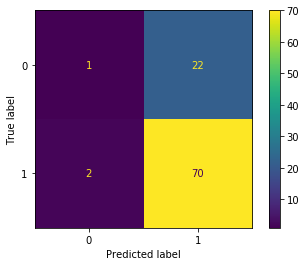

In [50]:
# Plotting Confusion Matrix
svc=SVC()
svc.fit(x_train,y_train)
plot_confusion_matrix(svc, x_test, y_test)

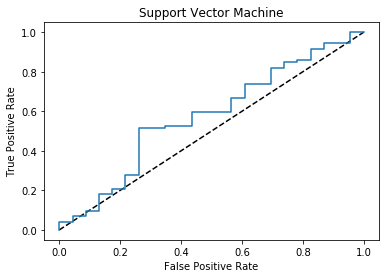

In [51]:
# Plotting ROC Curve for the model
y_pred_prob=xgb.predict_proba(x_test)[:,1]  #1 is the probabilty of threshold value
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Support Vector Machine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine')
plt.show()

In [52]:
#Exporting model as pkl file
joblib.dump(svc,'SVC_Loan_Prediction.pkl')

['SVC_Loan_Prediction.pkl']